# Monte Carlo Simulation: Correlation Analysis

## Simulation Steps and Importance

In this notebook, we use **Monte Carlo simulations** to analyze the significance of correlations between **Mean Length of Sentence (MLS)**, **Complex Nominals per Clause (CN/C)**, and **ErrorToWordRatio**. The Monte Carlo method is a powerful statistical tool that allows us to assess whether observed correlations between these variables are statistically significant or could have occurred by chance.

### Interesting:

1. **MLS and ErrorToWordRatio (Group 1 - Arin and Engin)**:  
   - Observed Correlation: **-0.7894**  
   - P-Value: **0.0154**  
   The strong negative correlation is statistically significant, indicating a real relationship between high MLS and lower Error rate.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.signal import detrend
from scipy.stats import pearsonr

# Load the dataset from your local file path
df = pd.read_csv(r'C:\Users\egeme\Desktop\Diss Stuff\Adams Stats Assignment/collaborative.csv')

# List of all peer groups as provided earlier
peer_groups = [
    'G1 Arin Engin', 'G1 Aysen Sinem', 'G1 Cello Ezgi', 'G1 Dilara Sila', 
    'G1 Elanur EceBerfu', 'G1 Helin Senay', 'G1 Nupelda Eda', 'G1 Oyku Cahit', 
    'G1 Selin Zahide', 'G1 Umay Kubra', 'G2 Abidin Osman', 'G2 AleynaCeren', 
    'G2 Ayse Halime', 'G2 Beyza Umur', 'G2 Ceren Mihriban', 'G2 Damla Sumeyye', 
    'G2 Fadime Sura', 'G2 Fatma Eren', 'G2 Songul Esma', 'G2 Zeynep Elif'
]

# Creating individual dataframes for each peer group and storing them in a dictionary
dfs = {}
for group in peer_groups:
    df_name = group.lower().replace(" ", "_") + "_df"
    dfs[df_name] = df[df['Peer'].str.contains(group)]

# Display the dictionary with all dataframes
dfs.keys()

# Assigning each dataframe from the dictionary to its respective variable
g1_arin_engin_df = dfs['g1_arin_engin_df']
g1_aysen_sinem_df = dfs['g1_aysen_sinem_df']
g1_cello_ezgi_df = dfs['g1_cello_ezgi_df']
g1_dilara_sila_df = dfs['g1_dilara_sila_df']
g1_elanur_eceberfu_df = dfs['g1_elanur_eceberfu_df']
g1_helin_senay_df = dfs['g1_helin_senay_df']
g1_nupelda_eda_df = dfs['g1_nupelda_eda_df']
g1_oyku_cahit_df = dfs['g1_oyku_cahit_df']
g1_selin_zahide_df = dfs['g1_selin_zahide_df']
g1_umay_kubra_df = dfs['g1_umay_kubra_df']
g2_abidin_osman_df = dfs['g2_abidin_osman_df']
g2_aleynaceren_df = dfs['g2_aleynaceren_df']
g2_ayse_halime_df = dfs['g2_ayse_halime_df']
g2_beyza_umur_df = dfs['g2_beyza_umur_df']
g2_ceren_mihriban_df = dfs['g2_ceren_mihriban_df']
g2_damla_sumeyye_df = dfs['g2_damla_sumeyye_df']
g2_fadime_sura_df = dfs['g2_fadime_sura_df']
g2_fatma_eren_df = dfs['g2_fatma_eren_df']
g2_songul_esma_df = dfs['g2_songul_esma_df']
g2_zeynep_elif_df = dfs['g2_zeynep_elif_df']

# Creating a list to hold all G1 and G2 dataframes
g1_dataframes = [
    g1_arin_engin_df, g1_aysen_sinem_df, g1_cello_ezgi_df, g1_dilara_sila_df,
    g1_elanur_eceberfu_df, g1_helin_senay_df, g1_nupelda_eda_df,
    g1_oyku_cahit_df, g1_selin_zahide_df, g1_umay_kubra_df
]

g2_dataframes = [
    g2_abidin_osman_df, g2_aleynaceren_df, g2_ayse_halime_df,
    g2_beyza_umur_df, g2_ceren_mihriban_df, g2_damla_sumeyye_df,
    g2_fadime_sura_df, g2_fatma_eren_df, g2_songul_esma_df,
    g2_zeynep_elif_df
]

# Verifying the lists have been created
len(g1_dataframes), len(g2_dataframes)  # Should return 10 for each list

# Load the dataset from your local file path
df = pd.read_csv(r'C:\Users\egeme\Desktop\Diss Stuff\Adams Stats Assignment/collaborative.csv')

# List of all peer groups as provided earlier
peer_groups = [
    'G1 Arin Engin', 'G1 Aysen Sinem', 'G1 Cello Ezgi', 'G1 Dilara Sila', 
    'G1 Elanur EceBerfu', 'G1 Helin Senay', 'G1 Nupelda Eda', 'G1 Oyku Cahit', 
    'G1 Selin Zahide', 'G1 Umay Kubra', 'G2 Abidin Osman', 'G2 AleynaCeren', 
    'G2 Ayse Halime', 'G2 Beyza Umur', 'G2 Ceren Mihriban', 'G2 Damla Sumeyye', 
    'G2 Fadime Sura', 'G2 Fatma Eren', 'G2 Songul Esma', 'G2 Zeynep Elif'
]

# Creating individual dataframes for each peer group and storing them in a dictionary
dfs = {}
for group in peer_groups:
    df_name = group.lower().replace(" ", "_") + "_df"
    dfs[df_name] = df[df['Peer'].str.contains(group)]

# Display the dictionary with all dataframes
dfs.keys()

# Assigning each dataframe from the dictionary to its respective variable
g1_arin_engin_df = dfs['g1_arin_engin_df']
g1_aysen_sinem_df = dfs['g1_aysen_sinem_df']
g1_cello_ezgi_df = dfs['g1_cello_ezgi_df']
g1_dilara_sila_df = dfs['g1_dilara_sila_df']
g1_elanur_eceberfu_df = dfs['g1_elanur_eceberfu_df']
g1_helin_senay_df = dfs['g1_helin_senay_df']
g1_nupelda_eda_df = dfs['g1_nupelda_eda_df']
g1_oyku_cahit_df = dfs['g1_oyku_cahit_df']
g1_selin_zahide_df = dfs['g1_selin_zahide_df']
g1_umay_kubra_df = dfs['g1_umay_kubra_df']
g2_abidin_osman_df = dfs['g2_abidin_osman_df']
g2_aleynaceren_df = dfs['g2_aleynaceren_df']
g2_ayse_halime_df = dfs['g2_ayse_halime_df']
g2_beyza_umur_df = dfs['g2_beyza_umur_df']
g2_ceren_mihriban_df = dfs['g2_ceren_mihriban_df']
g2_damla_sumeyye_df = dfs['g2_damla_sumeyye_df']
g2_fadime_sura_df = dfs['g2_fadime_sura_df']
g2_fatma_eren_df = dfs['g2_fatma_eren_df']
g2_songul_esma_df = dfs['g2_songul_esma_df']
g2_zeynep_elif_df = dfs['g2_zeynep_elif_df']

# Creating a list to hold all G1 and G2 dataframes
g1_dataframes = [
    g1_arin_engin_df, g1_aysen_sinem_df, g1_cello_ezgi_df, g1_dilara_sila_df,
    g1_elanur_eceberfu_df, g1_helin_senay_df, g1_nupelda_eda_df,
    g1_oyku_cahit_df, g1_selin_zahide_df, g1_umay_kubra_df
]

g2_dataframes = [
    g2_abidin_osman_df, g2_aleynaceren_df, g2_ayse_halime_df,
    g2_beyza_umur_df, g2_ceren_mihriban_df, g2_damla_sumeyye_df,
    g2_fadime_sura_df, g2_fatma_eren_df, g2_songul_esma_df,
    g2_zeynep_elif_df
]

# Verifying the lists have been created
len(g1_dataframes), len(g2_dataframes)  # Should return 10 for each list

# Function to detrend and normalize specific columns in a dataframe
def detrend_and_normalize_columns(df, columns_to_normalize):
    df_detrended = df.copy()  # Make a copy of the original dataframe to avoid modifying it directly
    
    # Loop over all columns and detrend if the column contains numeric data
    for col in df.columns:
        if col in columns_to_normalize:
            if np.issubdtype(df[col].dtype, np.number):  # Check if the column is numeric
                df_detrended[col] = detrend(df[col])
    
    # Normalize the columns to have values between 0 and 1
    scaler = MinMaxScaler()
    df_detrended[columns_to_normalize] = scaler.fit_transform(df_detrended[columns_to_normalize])
    
    return df_detrended

# Columns to detrend and normalize: MLS, CN/C, ErrorToWordRatio
columns_to_normalize = ['MLS', 'CN_C', 'ErrorToWordRatio']

# Detrend and normalize all G1 dataframes
g1_dataframes_detrended = [detrend_and_normalize_columns(df, columns_to_normalize) for df in g1_dataframes]

# Detrend and normalize all G2 dataframes
g2_dataframes_detrended = [detrend_and_normalize_columns(df, columns_to_normalize) for df in g2_dataframes]

# Assign individual detrended and normalized dataframes for G1
g1_arin_engin_df_detrended = g1_dataframes_detrended[0]
g1_aysen_sinem_df_detrended = g1_dataframes_detrended[1]
g1_cello_ezgi_df_detrended = g1_dataframes_detrended[2]
g1_dilara_sila_df_detrended = g1_dataframes_detrended[3]
g1_elanur_eceberfu_df_detrended = g1_dataframes_detrended[4]
g1_helin_senay_df_detrended = g1_dataframes_detrended[5]
g1_nupelda_eda_df_detrended = g1_dataframes_detrended[6]
g1_oyku_cahit_df_detrended = g1_dataframes_detrended[7]
g1_selin_zahide_df_detrended = g1_dataframes_detrended[8]
g1_umay_kubra_df_detrended = g1_dataframes_detrended[9]

# Assign individual detrended and normalized dataframes for G2
g2_abidin_osman_df_detrended = g2_dataframes_detrended[0]
g2_aleynaceren_df_detrended = g2_dataframes_detrended[1]
g2_ayse_halime_df_detrended = g2_dataframes_detrended[2]
g2_beyza_umur_df_detrended = g2_dataframes_detrended[3]
g2_ceren_mihriban_df_detrended = g2_dataframes_detrended[4]
g2_damla_sumeyye_df_detrended = g2_dataframes_detrended[5]
g2_fadime_sura_df_detrended = g2_dataframes_detrended[6]
g2_fatma_eren_df_detrended = g2_dataframes_detrended[7]
g2_songul_esma_df_detrended = g2_dataframes_detrended[8]
g2_zeynep_elif_df_detrended = g2_dataframes_detrended[9]

# Verify detrended and normalized dataframes are created
len(g1_dataframes_detrended), len(g2_dataframes_detrended)  # Should return 10 for each list


(10, 10)

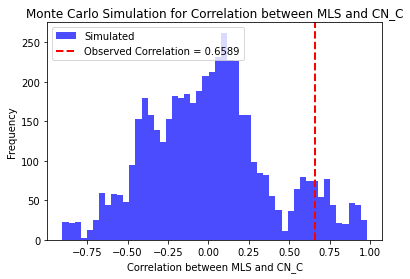

MLS and CN_C - Observed Correlation: 0.6589, P-Value: 0.1028


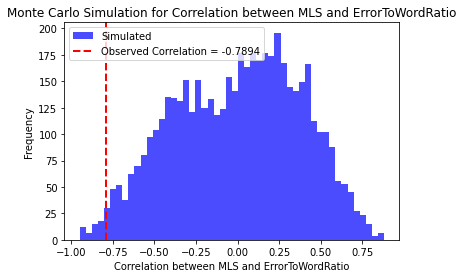

MLS and ErrorToWordRatio - Observed Correlation: -0.7894, P-Value: 0.0154


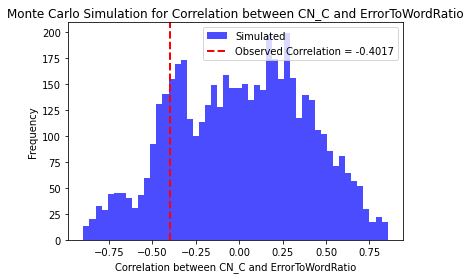

CN_C and ErrorToWordRatio - Observed Correlation: -0.4017, P-Value: 0.3244


In [2]:
# Monte Carlo simulation for correlation significance
def monte_carlo_correlation_simulation(df, col1, col2, num_simulations=5000):
    # Calculate the observed correlation
    observed_corr, _ = pearsonr(df[col1], df[col2])
    
    # Generate simulated correlations by shuffling the columns
    simulated_corrs = []
    for _ in range(num_simulations):
        shuffled_col1 = np.random.permutation(df[col1])
        simulated_corr, _ = pearsonr(shuffled_col1, df[col2])
        simulated_corrs.append(simulated_corr)
    
    # Calculate the p-value
    simulated_corrs = np.array(simulated_corrs)
    p_value = np.sum(np.abs(simulated_corrs) >= np.abs(observed_corr)) / num_simulations
    
    # Plot the simulation results
    plt.hist(simulated_corrs, bins=50, alpha=0.7, color='b', label='Simulated')
    plt.axvline(observed_corr, color='r', linestyle='dashed', linewidth=2, label=f'Observed Correlation = {observed_corr:.4f}')
    plt.title(f"Monte Carlo Simulation for Correlation between {col1} and {col2}")
    plt.xlabel(f"Correlation between {col1} and {col2}")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
    
    return observed_corr, p_value

# Run the Monte Carlo simulation for correlations between MLS and CN_C
observed_corr_mls_cn_c, p_value_mls_cn_c = monte_carlo_correlation_simulation(g1_arin_engin_df_detrended, 'MLS', 'CN_C')

print(f"MLS and CN_C - Observed Correlation: {observed_corr_mls_cn_c:.4f}, P-Value: {p_value_mls_cn_c:.4f}")

# You can also run the same simulation for MLS and ErrorToWordRatio
observed_corr_mls_error, p_value_mls_error = monte_carlo_correlation_simulation(g1_arin_engin_df_detrended, 'MLS', 'ErrorToWordRatio')

print(f"MLS and ErrorToWordRatio - Observed Correlation: {observed_corr_mls_error:.4f}, P-Value: {p_value_mls_error:.4f}")

# Likewise, you can run for CN_C and ErrorToWordRatio
observed_corr_cn_c_error, p_value_cn_c_error = monte_carlo_correlation_simulation(g1_arin_engin_df_detrended, 'CN_C', 'ErrorToWordRatio')

print(f"CN_C and ErrorToWordRatio - Observed Correlation: {observed_corr_cn_c_error:.4f}, P-Value: {p_value_cn_c_error:.4f}")

Correlation Analysis for G1 Groups:

Group G1 Arin Engin:


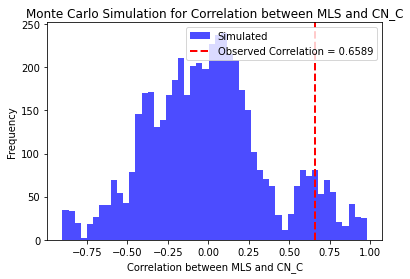

MLS and CN_C - Observed Correlation: 0.6589, P-Value: 0.1012


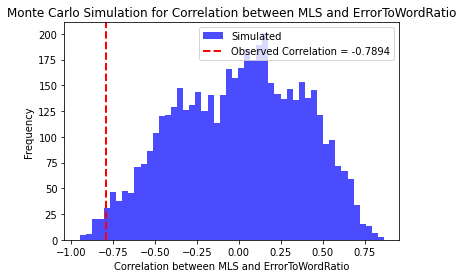

MLS and ErrorToWordRatio - Observed Correlation: -0.7894, P-Value: 0.0140


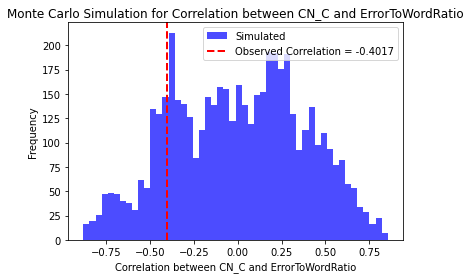

CN_C and ErrorToWordRatio - Observed Correlation: -0.4017, P-Value: 0.3252

Group G1 Aysen Sinem:


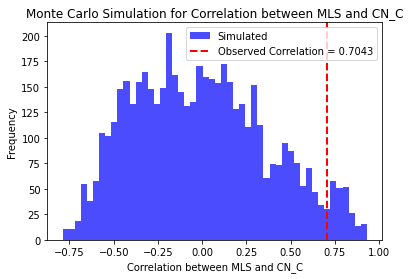

MLS and CN_C - Observed Correlation: 0.7043, P-Value: 0.0514


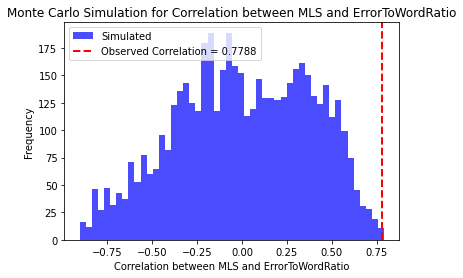

MLS and ErrorToWordRatio - Observed Correlation: 0.7788, P-Value: 0.0200


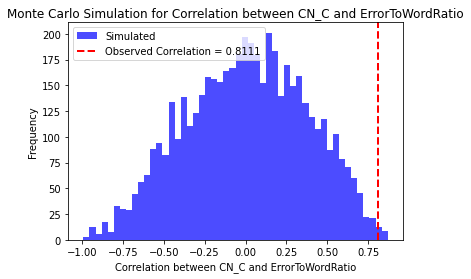

CN_C and ErrorToWordRatio - Observed Correlation: 0.8111, P-Value: 0.0124

Group G1 Cello Ezgi:


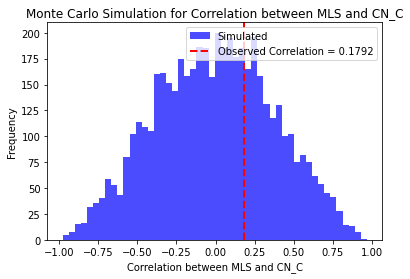

MLS and CN_C - Observed Correlation: 0.1792, P-Value: 0.6688


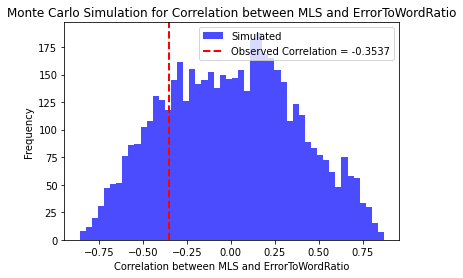

MLS and ErrorToWordRatio - Observed Correlation: -0.3537, P-Value: 0.3900


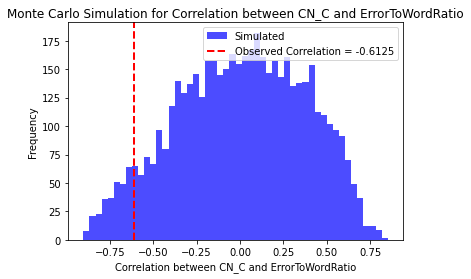

CN_C and ErrorToWordRatio - Observed Correlation: -0.6125, P-Value: 0.0970

Group G1 Dilara Sila:


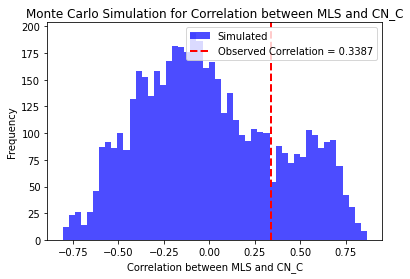

MLS and CN_C - Observed Correlation: 0.3387, P-Value: 0.4228


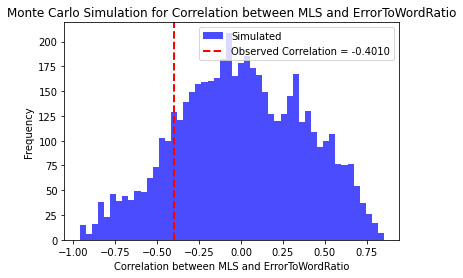

MLS and ErrorToWordRatio - Observed Correlation: -0.4010, P-Value: 0.3192


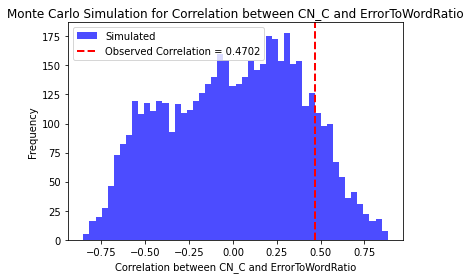

CN_C and ErrorToWordRatio - Observed Correlation: 0.4702, P-Value: 0.2590

Group G1 Elanur EceBerfu:


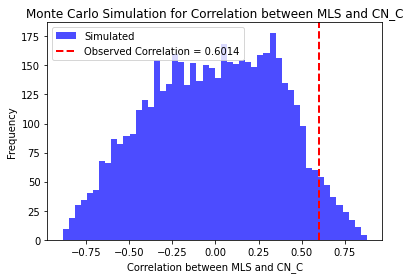

MLS and CN_C - Observed Correlation: 0.6014, P-Value: 0.1056


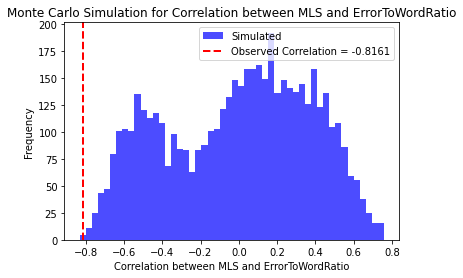

MLS and ErrorToWordRatio - Observed Correlation: -0.8161, P-Value: 0.0004


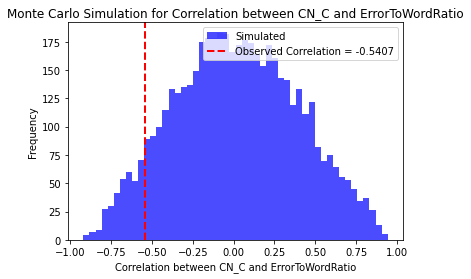

CN_C and ErrorToWordRatio - Observed Correlation: -0.5407, P-Value: 0.1672

Group G1 Helin Senay:


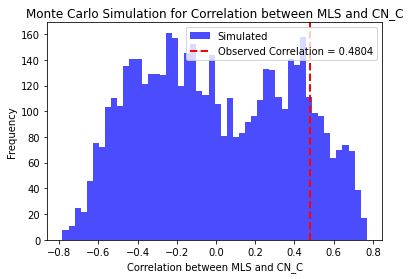

MLS and CN_C - Observed Correlation: 0.4804, P-Value: 0.2374


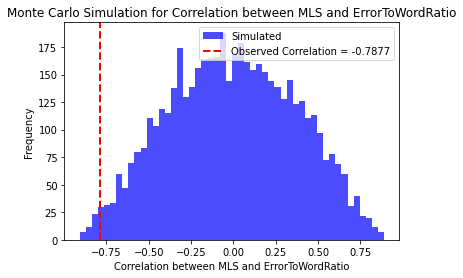

MLS and ErrorToWordRatio - Observed Correlation: -0.7877, P-Value: 0.0180


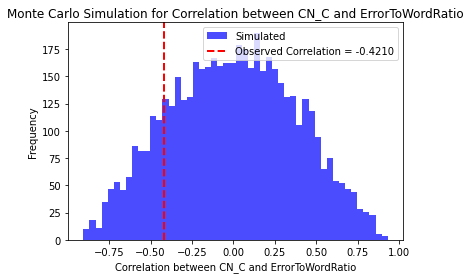

CN_C and ErrorToWordRatio - Observed Correlation: -0.4210, P-Value: 0.3058

Group G1 Nupelda Eda:


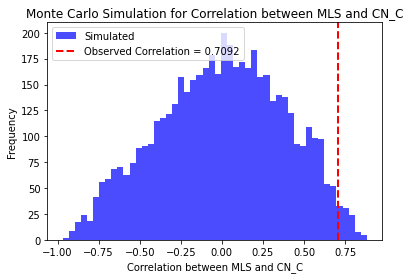

MLS and CN_C - Observed Correlation: 0.7092, P-Value: 0.0506


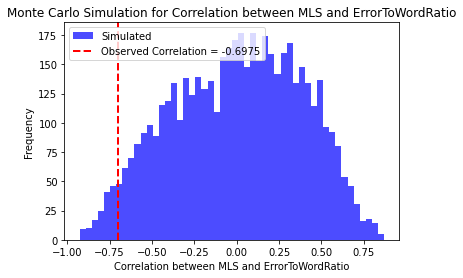

MLS and ErrorToWordRatio - Observed Correlation: -0.6975, P-Value: 0.0494


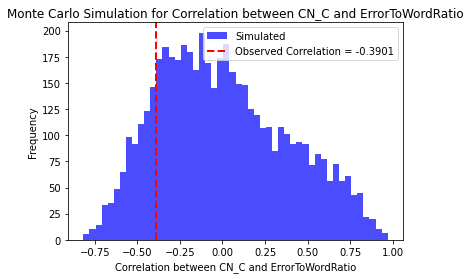

CN_C and ErrorToWordRatio - Observed Correlation: -0.3901, P-Value: 0.3414

Group G1 Oyku Cahit:


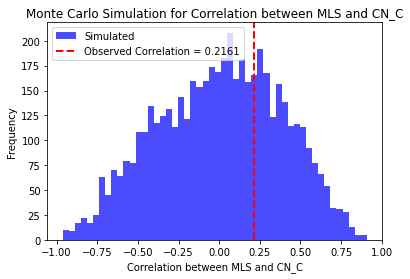

MLS and CN_C - Observed Correlation: 0.2161, P-Value: 0.6174


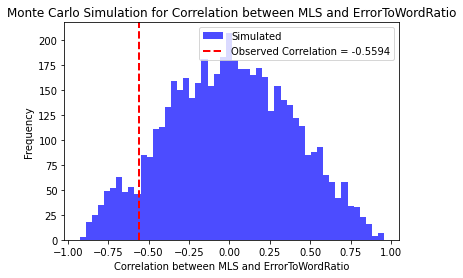

MLS and ErrorToWordRatio - Observed Correlation: -0.5594, P-Value: 0.1524


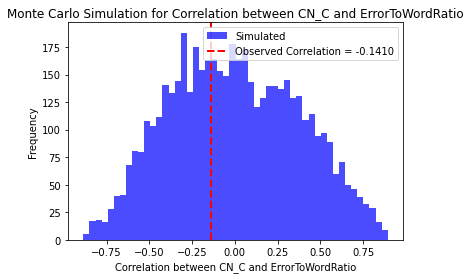

CN_C and ErrorToWordRatio - Observed Correlation: -0.1410, P-Value: 0.7548

Group G1 Selin Zahide:


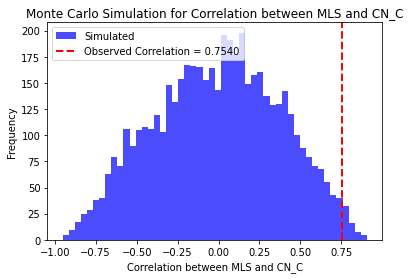

MLS and CN_C - Observed Correlation: 0.7540, P-Value: 0.0322


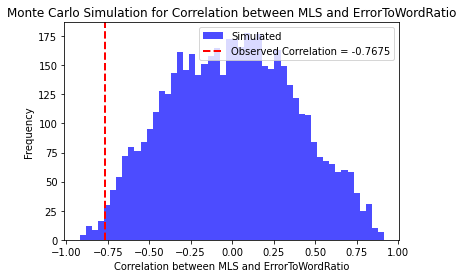

MLS and ErrorToWordRatio - Observed Correlation: -0.7675, P-Value: 0.0230


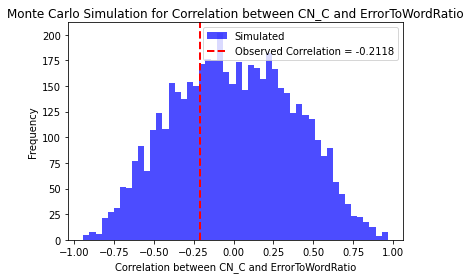

CN_C and ErrorToWordRatio - Observed Correlation: -0.2118, P-Value: 0.6254

Group G1 Umay Kubra:


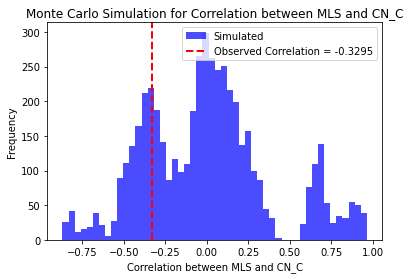

MLS and CN_C - Observed Correlation: -0.3295, P-Value: 0.3640


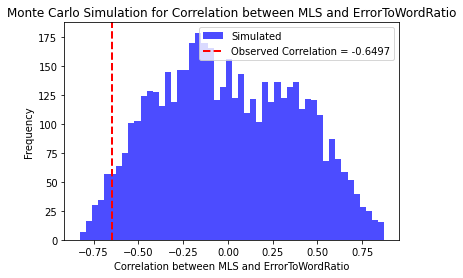

MLS and ErrorToWordRatio - Observed Correlation: -0.6497, P-Value: 0.0710


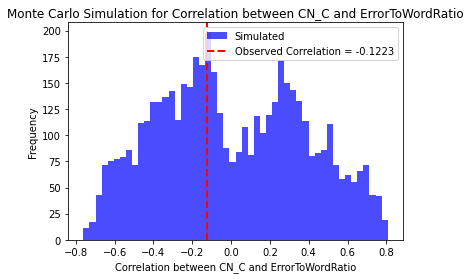

CN_C and ErrorToWordRatio - Observed Correlation: -0.1223, P-Value: 0.8302

Correlation Analysis for G2 Groups:

Group G2 Abidin Osman:


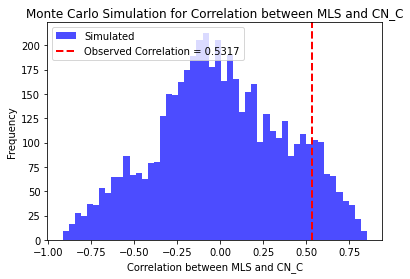

MLS and CN_C - Observed Correlation: 0.5317, P-Value: 0.1896


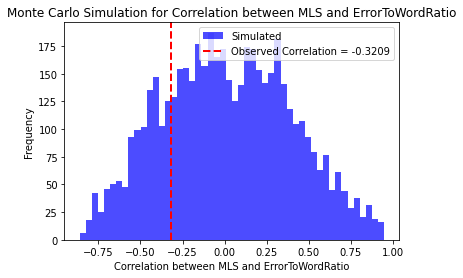

MLS and ErrorToWordRatio - Observed Correlation: -0.3209, P-Value: 0.4436


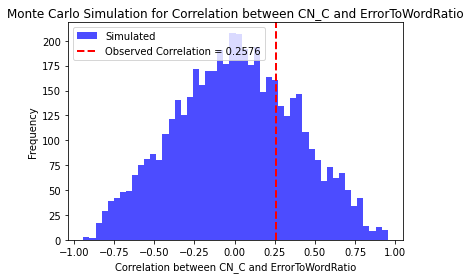

CN_C and ErrorToWordRatio - Observed Correlation: 0.2576, P-Value: 0.5194

Group G2 AleynaCeren:


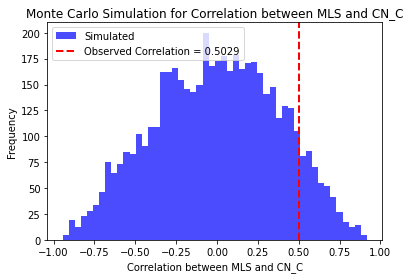

MLS and CN_C - Observed Correlation: 0.5029, P-Value: 0.2002


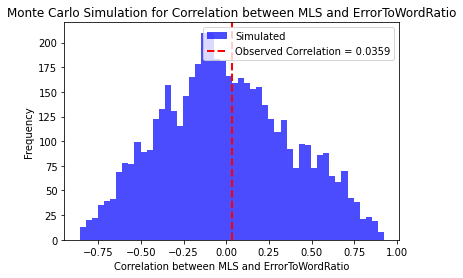

MLS and ErrorToWordRatio - Observed Correlation: 0.0359, P-Value: 0.9306


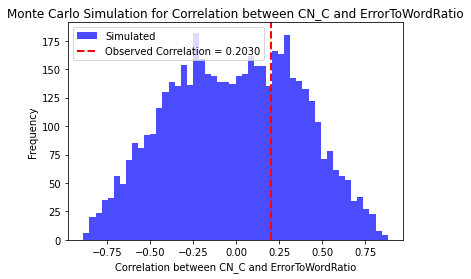

CN_C and ErrorToWordRatio - Observed Correlation: 0.2030, P-Value: 0.6608

Group G2 Ayse Halime:


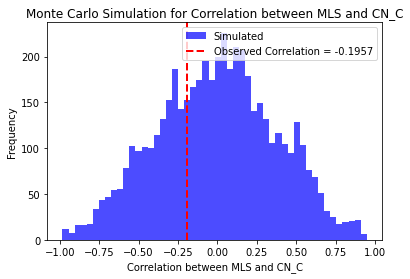

MLS and CN_C - Observed Correlation: -0.1957, P-Value: 0.6124


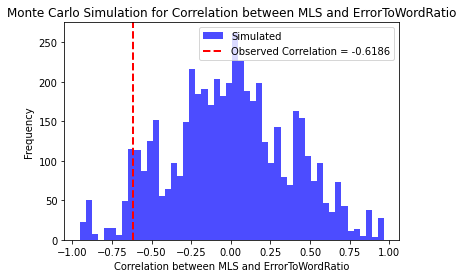

MLS and ErrorToWordRatio - Observed Correlation: -0.6186, P-Value: 0.0966


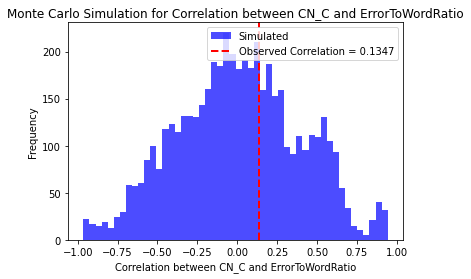

CN_C and ErrorToWordRatio - Observed Correlation: 0.1347, P-Value: 0.7218

Group G2 Beyza Umur:


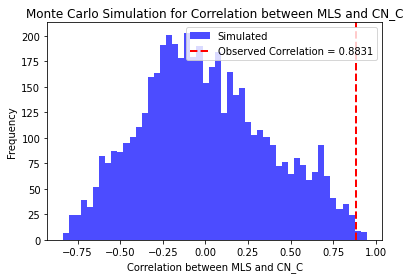

MLS and CN_C - Observed Correlation: 0.8831, P-Value: 0.0030


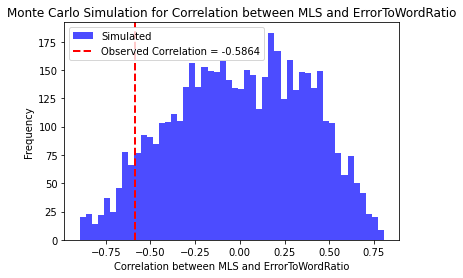

MLS and ErrorToWordRatio - Observed Correlation: -0.5864, P-Value: 0.1144


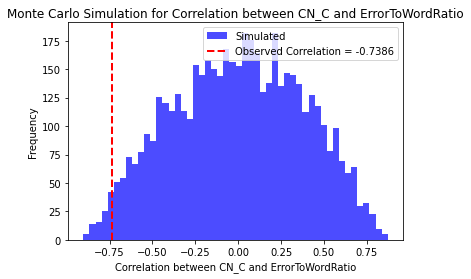

CN_C and ErrorToWordRatio - Observed Correlation: -0.7386, P-Value: 0.0304

Group G2 Ceren Mihriban:


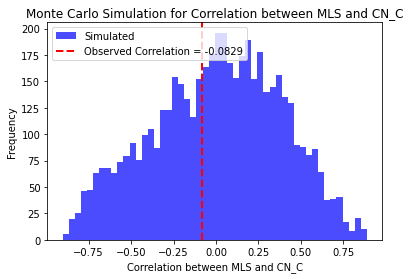

MLS and CN_C - Observed Correlation: -0.0829, P-Value: 0.8368


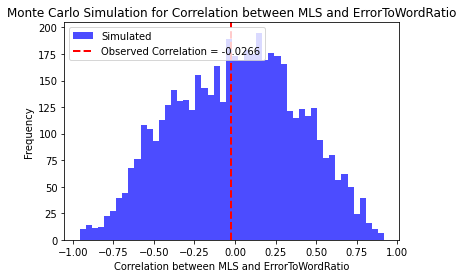

MLS and ErrorToWordRatio - Observed Correlation: -0.0266, P-Value: 0.9488


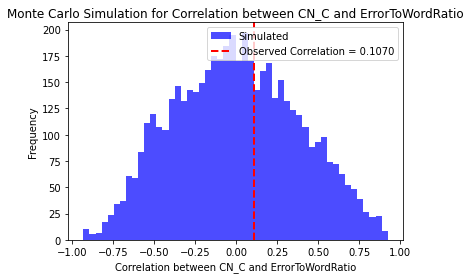

CN_C and ErrorToWordRatio - Observed Correlation: 0.1070, P-Value: 0.7898

Group G2 Damla Sumeyye:


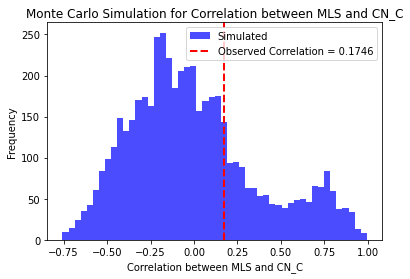

MLS and CN_C - Observed Correlation: 0.1746, P-Value: 0.6228


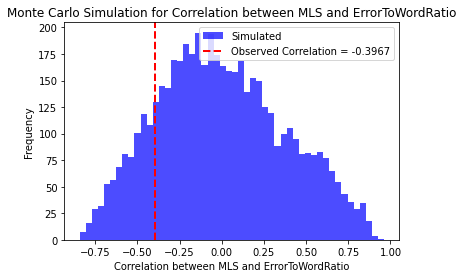

MLS and ErrorToWordRatio - Observed Correlation: -0.3967, P-Value: 0.3298


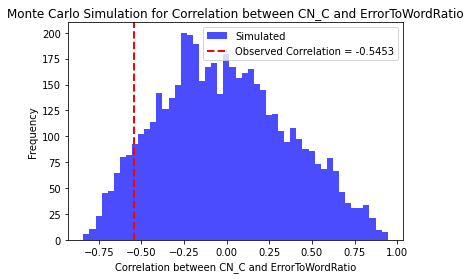

CN_C and ErrorToWordRatio - Observed Correlation: -0.5453, P-Value: 0.1644

Group G2 Fadime Sura:


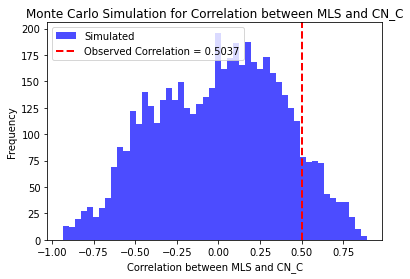

MLS and CN_C - Observed Correlation: 0.5037, P-Value: 0.1960


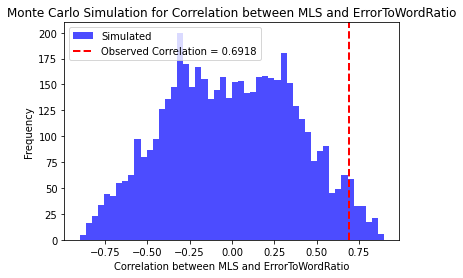

MLS and ErrorToWordRatio - Observed Correlation: 0.6918, P-Value: 0.0614


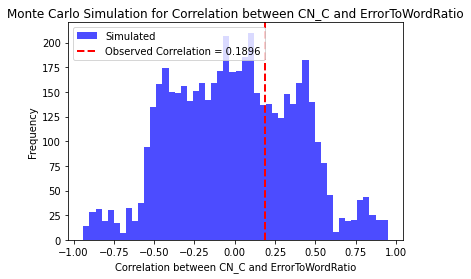

CN_C and ErrorToWordRatio - Observed Correlation: 0.1896, P-Value: 0.6588

Group G2 Fatma Eren:


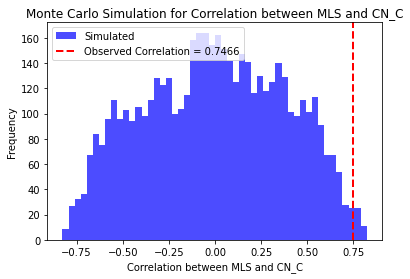

MLS and CN_C - Observed Correlation: 0.7466, P-Value: 0.0166


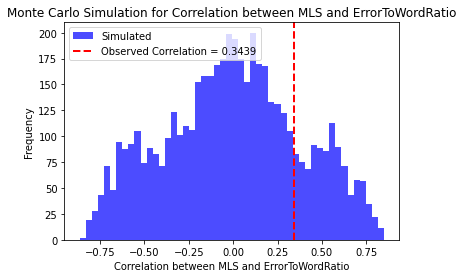

MLS and ErrorToWordRatio - Observed Correlation: 0.3439, P-Value: 0.4006


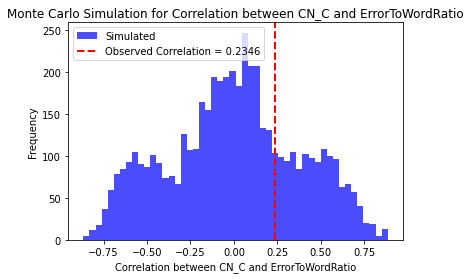

CN_C and ErrorToWordRatio - Observed Correlation: 0.2346, P-Value: 0.5286

Group G2 Songul Esma:


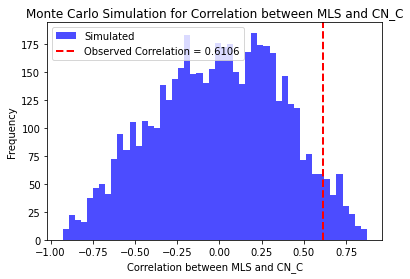

MLS and CN_C - Observed Correlation: 0.6106, P-Value: 0.1076


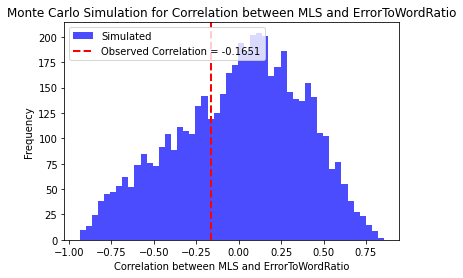

MLS and ErrorToWordRatio - Observed Correlation: -0.1651, P-Value: 0.6824


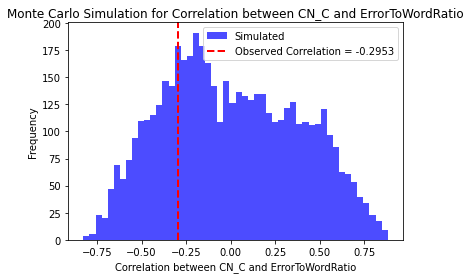

CN_C and ErrorToWordRatio - Observed Correlation: -0.2953, P-Value: 0.5096

Group G2 Zeynep Elif:


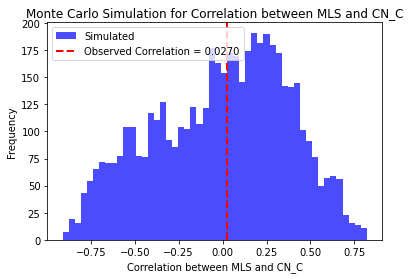

MLS and CN_C - Observed Correlation: 0.0270, P-Value: 0.9498


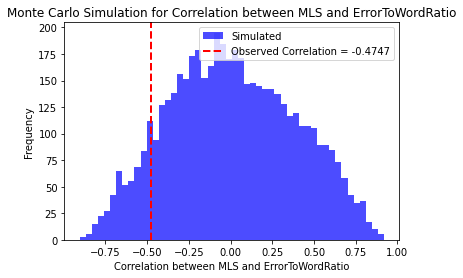

MLS and ErrorToWordRatio - Observed Correlation: -0.4747, P-Value: 0.2400


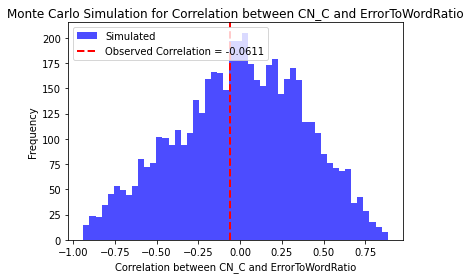

CN_C and ErrorToWordRatio - Observed Correlation: -0.0611, P-Value: 0.8658


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.signal import detrend
from scipy.stats import pearsonr

# Load the dataset from your local file path
df = pd.read_csv(r'C:\Users\egeme\Desktop\Diss Stuff\Adams Stats Assignment/collaborative.csv')

# List of all peer groups as provided earlier
peer_groups = [
    'G1 Arin Engin', 'G1 Aysen Sinem', 'G1 Cello Ezgi', 'G1 Dilara Sila', 
    'G1 Elanur EceBerfu', 'G1 Helin Senay', 'G1 Nupelda Eda', 'G1 Oyku Cahit', 
    'G1 Selin Zahide', 'G1 Umay Kubra', 'G2 Abidin Osman', 'G2 AleynaCeren', 
    'G2 Ayse Halime', 'G2 Beyza Umur', 'G2 Ceren Mihriban', 'G2 Damla Sumeyye', 
    'G2 Fadime Sura', 'G2 Fatma Eren', 'G2 Songul Esma', 'G2 Zeynep Elif'
]

# Creating individual dataframes for each peer group and storing them in a dictionary
dfs = {}
for group in peer_groups:
    df_name = group.lower().replace(" ", "_") + "_df"
    dfs[df_name] = df[df['Peer'].str.contains(group)]

# Separate G1 and G2 dataframes into lists
g1_dataframes = [dfs[df_name] for df_name in dfs if df_name.startswith('g1')]
g2_dataframes = [dfs[df_name] for df_name in dfs if df_name.startswith('g2')]

# Store the corresponding group names for each dataframe in G1 and G2
g1_group_names = [group for group in peer_groups if group.startswith('G1')]
g2_group_names = [group for group in peer_groups if group.startswith('G2')]

# Function to detrend and normalize specific columns in a dataframe
def detrend_and_normalize_columns(df, columns_to_normalize):
    df_detrended = df.copy()  # Make a copy of the original dataframe to avoid modifying it directly
    for col in columns_to_normalize:
        if col in df.columns and np.issubdtype(df[col].dtype, np.number):
            df_detrended[col] = detrend(df[col])
    scaler = MinMaxScaler()
    df_detrended[columns_to_normalize] = scaler.fit_transform(df_detrended[columns_to_normalize])
    return df_detrended

# Function to run Monte Carlo simulations and plot correlation significance
def monte_carlo_correlation_simulation(df, col1, col2, num_simulations=5000):
    observed_corr, _ = pearsonr(df[col1], df[col2])
    simulated_corrs = [pearsonr(np.random.permutation(df[col1]), df[col2])[0] for _ in range(num_simulations)]
    p_value = np.sum(np.abs(simulated_corrs) >= np.abs(observed_corr)) / num_simulations
    plt.hist(simulated_corrs, bins=50, alpha=0.7, color='b', label='Simulated')
    plt.axvline(observed_corr, color='r', linestyle='dashed', linewidth=2, label=f'Observed Correlation = {observed_corr:.4f}')
    plt.title(f"Monte Carlo Simulation for Correlation between {col1} and {col2}")
    plt.xlabel(f"Correlation between {col1} and {col2}")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
    return observed_corr, p_value

# Detrend and normalize G1 and G2 dataframes
columns_to_normalize = ['MLS', 'CN_C', 'ErrorToWordRatio']
g1_dataframes_detrended = [detrend_and_normalize_columns(df, columns_to_normalize) for df in g1_dataframes]
g2_dataframes_detrended = [detrend_and_normalize_columns(df, columns_to_normalize) for df in g2_dataframes]

# Run correlation analyses for all G1 dataframes
print("Correlation Analysis for G1 Groups:")
for idx, (df, group_name) in enumerate(zip(g1_dataframes_detrended, g1_group_names)):
    print(f"\nGroup {group_name}:")
    if 'MLS' in df.columns and 'CN_C' in df.columns:
        observed_corr_mls_cn_c, p_value_mls_cn_c = monte_carlo_correlation_simulation(df, 'MLS', 'CN_C')
        print(f"MLS and CN_C - Observed Correlation: {observed_corr_mls_cn_c:.4f}, P-Value: {p_value_mls_cn_c:.4f}")

    if 'MLS' in df.columns and 'ErrorToWordRatio' in df.columns:
        observed_corr_mls_error, p_value_mls_error = monte_carlo_correlation_simulation(df, 'MLS', 'ErrorToWordRatio')
        print(f"MLS and ErrorToWordRatio - Observed Correlation: {observed_corr_mls_error:.4f}, P-Value: {p_value_mls_error:.4f}")

    if 'CN_C' in df.columns and 'ErrorToWordRatio' in df.columns:
        observed_corr_cn_c_error, p_value_cn_c_error = monte_carlo_correlation_simulation(df, 'CN_C', 'ErrorToWordRatio')
        print(f"CN_C and ErrorToWordRatio - Observed Correlation: {observed_corr_cn_c_error:.4f}, P-Value: {p_value_cn_c_error:.4f}")

# Run correlation analyses for all G2 dataframes
print("\nCorrelation Analysis for G2 Groups:")
for idx, (df, group_name) in enumerate(zip(g2_dataframes_detrended, g2_group_names)):
    print(f"\nGroup {group_name}:")
    if 'MLS' in df.columns and 'CN_C' in df.columns:
        observed_corr_mls_cn_c, p_value_mls_cn_c = monte_carlo_correlation_simulation(df, 'MLS', 'CN_C')
        print(f"MLS and CN_C - Observed Correlation: {observed_corr_mls_cn_c:.4f}, P-Value: {p_value_mls_cn_c:.4f}")

    if 'MLS' in df.columns and 'ErrorToWordRatio' in df.columns:
        observed_corr_mls_error, p_value_mls_error = monte_carlo_correlation_simulation(df, 'MLS', 'ErrorToWordRatio')
        print(f"MLS and ErrorToWordRatio - Observed Correlation: {observed_corr_mls_error:.4f}, P-Value: {p_value_mls_error:.4f}")

    if 'CN_C' in df.columns and 'ErrorToWordRatio' in df.columns:
        observed_corr_cn_c_error, p_value_cn_c_error = monte_carlo_correlation_simulation(df, 'CN_C', 'ErrorToWordRatio')
        print(f"CN_C and ErrorToWordRatio - Observed Correlation: {observed_corr_cn_c_error:.4f}, P-Value: {p_value_cn_c_error:.4f}")
